<a href="https://colab.research.google.com/github/tohnperfect/DPDM2021/blob/main/Classification_(Decision_Tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Scikit-learn คือ package ที่รวบรวมอัลกอริทึม ที่เกี่ยวข้องกับ machine learning และ data mining (sklearn)

# Load Data

In [1]:
from sklearn import datasets

iris_data = datasets.load_iris()

In [2]:
iris_data

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [3]:
X = iris_data['data']
Y = iris_data['target']

# Train Model

## import

In [4]:
from sklearn.tree import DecisionTreeClassifier

## define

In [5]:
mytree = DecisionTreeClassifier()

## train

In [6]:
mytree.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## plot tree

In [7]:
from sklearn.tree import plot_tree

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

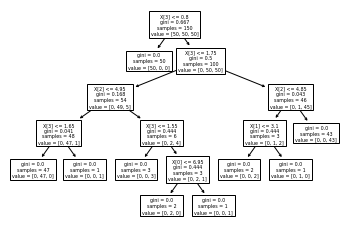

In [8]:
plot_tree(mytree)

# Evaluation

In [9]:
import numpy as np

np.random.choice(['kie','oil','nicha'])

'nicha'

In [10]:
np.random.seed(6)
np.random.choice(['kie','oil','nicha'])

'nicha'

# Advanced Tree

## load data

In [11]:
from sklearn import datasets

In [12]:
mnist_data = datasets.load_digits()

In [13]:
#mnist_data

In [14]:
X = mnist_data['data']
X.shape

(1797, 64)

In [15]:
X[0,:]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [16]:
X[0,:].shape

(64,)

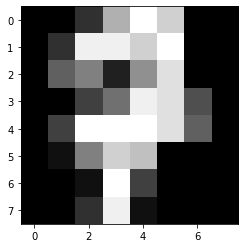

In [17]:
from matplotlib import pyplot as plt
import numpy as np

plt.imshow(X[112,:].reshape([8,8]),cmap='gray')

In [18]:
np.max(X)

16.0

In [19]:
Y = mnist_data['target']
Y.shape

(1797,)

In [20]:
Y[112]

7

## แบ่ง test เอาไว้วัดผลอย่างเดียว

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=6)

In [23]:
X_train[:5,:6]

array([[ 0.,  0.,  8., 15.,  9.,  0.],
       [ 0.,  0.,  0.,  9., 11.,  0.],
       [ 0.,  1., 12., 16., 16., 16.],
       [ 0.,  0., 12., 14.,  6.,  0.],
       [ 0.,  0.,  1.,  8.,  8.,  9.]])

## เริ่มสร้างโมเดล

### หา validation set

In [24]:
X_traintrain, X_val, y_traintrain, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=6)

In [25]:
X_traintrain[:5,:7]

array([[ 0.,  0.,  9., 16., 10.,  2.,  0.],
       [ 0.,  1., 15.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 14., 16., 15.,  1.],
       [ 0.,  0.,  3., 11., 14., 12.,  3.],
       [ 0.,  0.,  5., 12., 16., 15.,  0.]])

1. ใช้ Entropy มี ความสูงไม่เกิน 4 ชั้น (Oil)
2. ใช้ Gini และ leaf node ต้องมีจำนวน data ไม่น้อยกว่า 5 (Nicha)
3. ใช้ Entropy และ มี จำนวน leaf node ไม่เกิน 15 (Kie)

Import

In [26]:
from sklearn.tree import DecisionTreeClassifier

Define

In [27]:
mytree0 = DecisionTreeClassifier(criterion='gini',max_depth=7,min_samples_split=30,min_samples_leaf=5)

Train

In [28]:
mytree0.fit(X_traintrain,y_traintrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(176.74946808510637, 203.85, 'X[30] <= 0.5\ngini = 0.899\nsamples = 628\nvalue = [57, 70, 56, 74, 54, 61, 62, 61, 64, 69]'),
 Text(86.37127659574467, 176.67000000000002, 'X[20] <= 3.5\ngini = 0.857\nsamples = 383\nvalue = [0, 62, 54, 68, 11, 54, 61, 12, 51, 10]'),
 Text(42.740425531914894, 149.49, 'X[42] <= 11.5\ngini = 0.641\nsamples = 122\nvalue = [0, 3, 1, 1, 4, 43, 58, 1, 10, 1]'),
 Text(28.493617021276595, 122.31, 'X[21] <= 7.0\ngini = 0.449\nsamples = 56\nvalue = [0, 3, 1, 1, 0, 41, 3, 1, 5, 1]'),
 Text(21.370212765957447, 95.13, 'X[62] <= 7.0\ngini = 0.231\nsamples = 47\nvalue = [0, 3, 0, 0, 0, 41, 3, 0, 0, 0]'),
 Text(14.246808510638298, 67.94999999999999, 'X[61] <= 10.0\ngini = 0.046\nsamples = 42\nvalue = [0, 0, 0, 0, 0, 41, 1, 0, 0, 0]'),
 Text(7.123404255319149, 40.77000000000001, 'gini = 0.0\nsamples = 37\nvalue = [0, 0, 0, 0, 0, 37, 0, 0, 0, 0]'),
 Text(21.370212765957447, 40.77000000000001, 'gini = 0.32\nsamples = 5\nvalue = [0, 0, 0, 0, 0, 4, 1, 0, 0, 0]'),
 Text(2

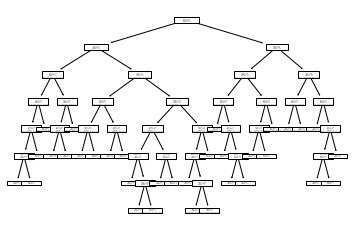

In [29]:
plot_tree(mytree0)

## ใช้ Entropy มี ความสูงไม่เกิน 4 ชั้น (Oil)

In [30]:
mytree1 = DecisionTreeClassifier(criterion='entropy',max_depth=4)
mytree1.fit(X_traintrain,y_traintrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## ใช้ Gini และ leaf node ต้องมีจำนวน data ไม่น้อยกว่า 5 (Nicha)

In [31]:
mytree2 = DecisionTreeClassifier(criterion='gini',min_samples_leaf=5)
mytree2.fit(X_traintrain,y_traintrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## ใช้ Entropy และ มี จำนวน leaf node ไม่เกิน 15 (Kie)

In [32]:
mytree3 = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=15)
mytree3.fit(X_traintrain,y_traintrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=15,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## ทดสอบ หา model ที่ดีที่สุดด้วย validation set

In [33]:
t0_result = mytree0.predict(X_val)

In [34]:
t0_result

array([7, 7, 3, 0, 8, 4, 1, 7, 0, 9, 3, 2, 6, 4, 8, 4, 3, 3, 8, 6, 2, 9,
       5, 4, 3, 6, 3, 4, 1, 8, 4, 1, 8, 5, 3, 3, 4, 1, 2, 0, 8, 0, 6, 5,
       3, 4, 6, 0, 6, 8, 2, 8, 6, 0, 9, 7, 0, 8, 5, 8, 0, 4, 5, 6, 5, 2,
       7, 9, 3, 1, 4, 9, 7, 5, 6, 4, 5, 0, 5, 8, 3, 4, 7, 5, 8, 4, 8, 9,
       1, 7, 1, 6, 7, 0, 8, 3, 8, 7, 1, 6, 7, 8, 1, 8, 8, 5, 4, 9, 6, 1,
       2, 5, 6, 3, 0, 3, 7, 1, 9, 8, 7, 7, 9, 5, 5, 6, 0, 8, 6, 4, 2, 9,
       8, 8, 6, 1, 1, 2, 3, 8, 9, 9, 5, 1, 5, 9, 5, 9, 8, 6, 3, 8, 6, 8,
       2, 2, 4, 4, 0, 1, 2, 6, 7, 4, 8, 9, 3, 4, 2, 7, 5, 0, 3, 0, 1, 6,
       4, 8, 1, 8, 4, 3, 9, 5, 5, 8, 5, 6, 1, 5, 8, 5, 7, 1, 8, 4, 3, 7,
       9, 6, 7, 7, 4, 7, 5, 7, 7, 8, 2, 5, 5, 8, 5, 4, 8, 7, 8, 8, 9, 4,
       5, 8, 2, 8, 5, 0, 9, 3, 4, 6, 3, 3, 1, 4, 2, 5, 4, 5, 0, 0, 3, 7,
       8, 5, 0, 8, 7, 5, 6, 3, 6, 4, 3, 9, 8, 6, 4, 3, 1, 6, 4, 8, 8, 5,
       1, 1, 2, 7, 7, 9])

In [35]:
y_val

array([4, 7, 3, 0, 6, 4, 7, 7, 0, 9, 3, 2, 6, 8, 8, 4, 3, 2, 7, 6, 2, 9,
       5, 6, 5, 6, 9, 4, 7, 2, 4, 1, 7, 5, 3, 3, 4, 1, 2, 0, 8, 0, 6, 5,
       3, 4, 6, 0, 6, 8, 2, 1, 6, 0, 9, 7, 0, 6, 3, 8, 0, 4, 5, 6, 9, 2,
       3, 9, 3, 1, 4, 9, 7, 5, 6, 7, 5, 0, 5, 8, 3, 6, 3, 9, 8, 4, 9, 9,
       8, 7, 1, 6, 3, 0, 8, 9, 8, 1, 1, 8, 7, 8, 4, 8, 8, 3, 4, 9, 6, 1,
       2, 5, 6, 3, 0, 7, 7, 1, 9, 7, 4, 4, 9, 5, 5, 6, 0, 8, 6, 6, 2, 9,
       8, 9, 6, 9, 1, 2, 3, 8, 9, 0, 5, 1, 9, 9, 5, 9, 3, 6, 5, 0, 6, 8,
       2, 2, 4, 2, 0, 1, 2, 6, 1, 4, 3, 9, 3, 4, 2, 7, 8, 0, 9, 0, 6, 6,
       4, 3, 5, 8, 4, 3, 9, 6, 5, 4, 5, 6, 3, 5, 4, 5, 7, 1, 2, 4, 5, 7,
       9, 6, 7, 2, 1, 4, 6, 7, 4, 8, 2, 5, 5, 7, 5, 4, 8, 7, 3, 3, 9, 4,
       5, 8, 2, 8, 5, 0, 9, 3, 4, 6, 3, 3, 1, 4, 2, 5, 4, 9, 0, 0, 3, 7,
       8, 5, 0, 9, 7, 5, 6, 3, 6, 4, 9, 9, 8, 6, 1, 3, 7, 6, 4, 0, 8, 5,
       9, 3, 2, 1, 1, 9])

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_val,t0_result)

0.7296296296296296

In [38]:
t1_result = mytree1.predict(X_val)
accuracy_score(y_val,t1_result)

0.6851851851851852

In [39]:
t2_result = mytree2.predict(X_val)
accuracy_score(y_val,t2_result)

0.7666666666666667

In [40]:
t3_result = mytree3.predict(X_val)
accuracy_score(y_val,t3_result)

0.6962962962962963

## สร้าง model จริง จาก training data

In [41]:
mytree2Full = DecisionTreeClassifier(criterion='gini',min_samples_leaf=5)
mytree2Full.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## วัดผล

In [42]:
final_result = mytree2Full.predict(X_test)

In [43]:
accuracy_score(y_test,final_result)

0.8008898776418243

# 3 Machine Learning Training Concepts

0.   your data & all data in the world
1.   split data -> train test validation
2.   finding the best model
3.   evaluate the model



### Naive Bayes

In [45]:
import pandas as pd

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f01ffbbcdd0>,
      dtype=object)

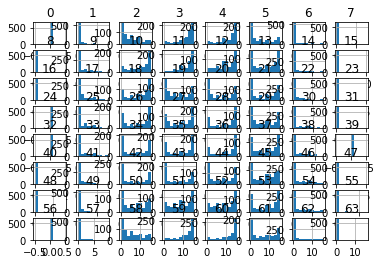

In [47]:
pd.DataFrame(X_traintrain).hist()